In [1]:
from IPython.display import HTML
HTML("""
<script>
function addCSS(){
style=`
    <style>
        h1,h2,h3,h4,h5,h6 { 
            text-align:center !important;
        }
    </style>
`
$("head").append(style);
}
addCSS()
</script>
""")

## Master 2 - MLDS - Paris Descartes 

## Projet Apprentissage Supervisé 
<em>le 15 janvier 2019 avant minuit</em>

<b><big>Mohamed Ben Hamdoune<span style="float:right">Lucas Iscovici</span></big></b>

## Le SUJET 
### Détection de fraude dans des transactions bancaires

## IMPORT 

In [71]:
from math import *
from collections import  Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import scale,PowerTransformer,FunctionTransformer,StandardScaler,RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.manifold import *
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier, ExtraTreesClassifier,VotingClassifier 
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierSK
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.utils.linear_assignment_ import linear_assignment 
from sklearn.base import clone,RegressorMixin,TransformerMixin,ClassifierMixin
from feature_selector import FeatureSelector
from cudatree import load_data, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import power_transform
from sklearn.metrics import make_scorer
import lightgbm as lgb
from sklearn.svm import SVC as SVCSK
from sklearn.preprocessing import LabelEncoder
try:
    import scikitplot 
except:
    pip.main(["install","scikit-plot"])
    import scikitplot 
from functools import partial
from tqdm import tqdm,tqdm_notebook
from xgboost import XGBClassifier,XGBRegressor
import importlib
import warnings
warnings.filterwarnings('ignore')
from imblearn.pipeline import make_pipeline as make_pipelineIMB
from thundersvmScikit import *
import dill as pickle
import scikitplot as skplt

In [2]:
T=True
F=False

In [3]:
pd.DataFrame.dropCol=lambda self,a:self.drop(a,axis=1)
pd.Series.whereDrop = lambda self,b: self.where(b).dropna() 
pd.DataFrame.appendCol=lambda self,name,value:pd.concat([self,pd.Series(value,name=name)],axis=1)

In [4]:
_make_cost_m=lambda cm:-cm + np.max(cm)
listToDict=lambda a:dict(zip(range(len(a)),a))
getTrueLabel=lambda a,b:pd.Series(b).map(dict(linear_assignment(_make_cost_m(confusion_matrix(b,a))))).values.tolist()

In [5]:
def sensitivity_specificity(a,b):
    l=pd.DataFrame.from_dict(classification_report(a,b,output_dict=T))
    return pd.DataFrame.from_records(dict(sensitivity=[l.loc["recall","0"]],specificity=[l.loc["recall","1"]]))

On définit les valeurs prisent par la classe cible:

In [6]:
FRAUD=1
NO_FRAUD=0

### Analyse Exploratoire des données

In [7]:
data=pd.read_csv("./data/creditcard.csv",low_memory=False)

In [8]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

###### PairPlot sur V21,V22

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Arial ('/usr/share/fonts/truetype/msttcorefonts/Arial.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


<Figure size 648x432 with 0 Axes>

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matp

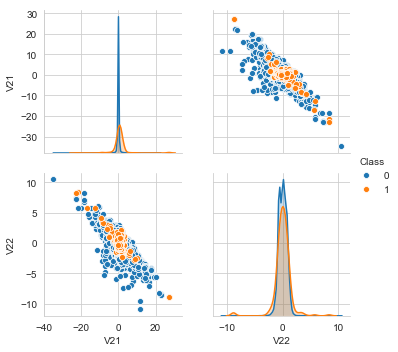

In [9]:
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(9,6))
    sns.pairplot(data, hue = 'Class', vars = ['V21','V22'])
    plt.show()

###### Amount en fonction de Class

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/mbenhamd/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


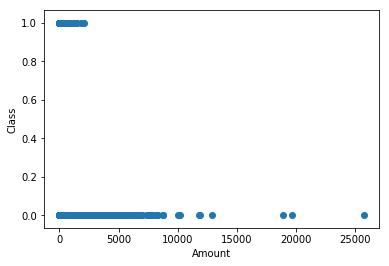

In [10]:
plt.scatter(data['Amount'],data['Class'])
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

###### Distribution des fraudes au cours du temps

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


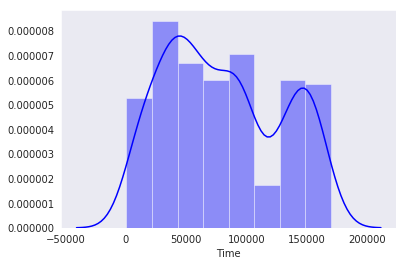

In [11]:
with sns.axes_style("dark"):
    sns.distplot(data.Time[data.Class == 1],color="b")

###### Distribution des transactions non frauduleuses au cours du temps

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


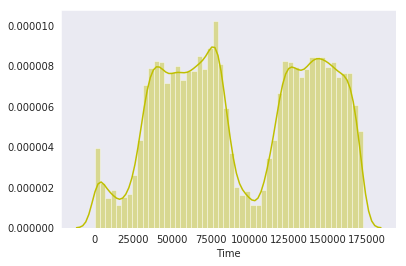

In [12]:
with sns.axes_style("dark"):
    sns.distplot(data.Time[data.Class == 0],color="y")

###### Normalisation des variables "Amount" et "Time"

In [13]:
r = RobustScaler()
data_scale = r.fit_transform(data[["Amount","Time"]])
data_scale = pd.DataFrame(data_scale,columns=["Amount","Time"])

In [14]:
datascale = pd.concat([data.dropCol(["Amount","Time"]).reset_index(),data_scale.reset_index()],axis=1)

In [15]:
datascale = datascale.dropCol("index")

In [16]:
datascale.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [17]:
datascale.shape

(284807, 31)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


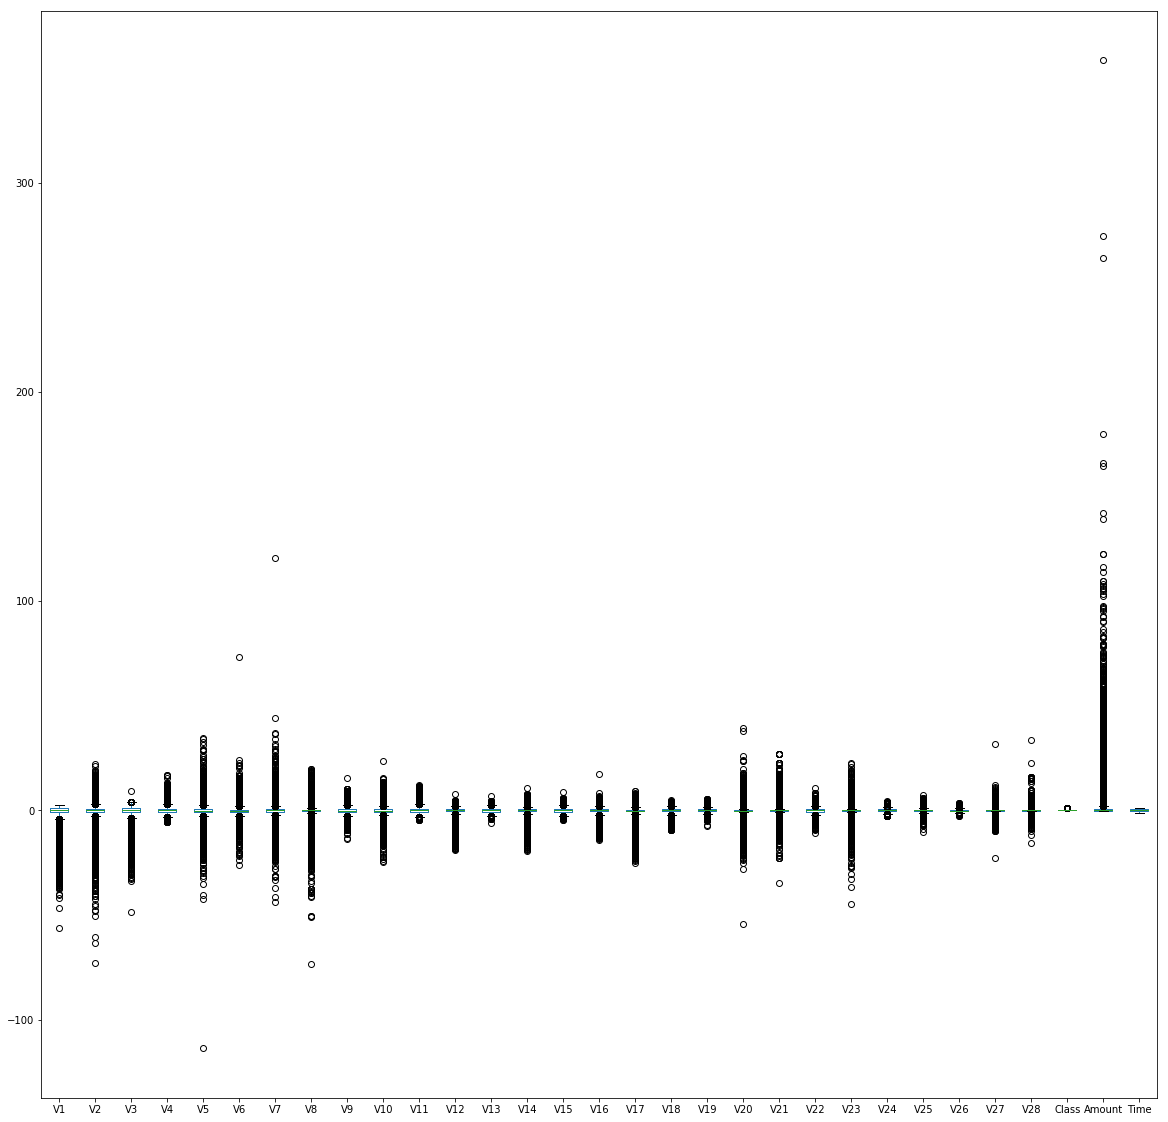

In [18]:
datascale.plot.box(return_type='axes', figsize=(20,20))

###### Partage des données avec stratification 

La taille du test_size sera de 25% des 284 807 lignes soit 71 201 données

In [19]:
XTrain,XTest,YTrain,YTest=train_test_split(datascale.dropCol("Class"),
                                           datascale.Class,
                                          stratify=datascale.Class,
                                          random_state=42)

###### Matrice de corrélation avec Pearson sur les données synthétiser

In [20]:
sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=297)
abc = sm.fit_sample(XTrain,YTrain)

Nous aurons des problèmes avec la régression puisqu'il existe des problèmes de corrélation linéaire entre les variables.

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x7f9a36050ef0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x7f9a36050ef0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


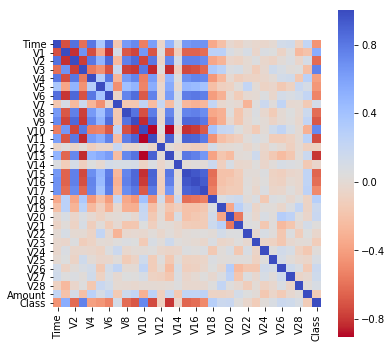

In [21]:
correlation_matrix = pd.DataFrame(np.c_[abc[0],abc[1]],columns=data.columns).corr('pearson')
fig = plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,square = True,cmap="coolwarm_r")
plt.show()

#### Métrique dans le cas des données déséquilibrer

In [22]:
def AUCPRC(testy, probs,plot=F,withAUC=F,withACC=F,withSS=F):
    '''
    AUCPRC(
        true_labels [n_samples] ,
        probas [n_samples] ou decision function,
        plot=F
    )
    '''
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    if plot:
        plt.plot([0, 1], [0.1, 0.1], linestyle='--')
        # plot the roc curve for the model
        plt.plot(recall, precision, marker='.')
        # show the plot
        plt.show()
    res = [("aucprc",auc(recall,precision))]
    if withAUC:
        res+=[("auc",roc_auc_score(testy, probs))]
    if withACC:
        cm=confusion_matrix(testy, probs)
        res+=[("acc",max(sum(np.diag(cm)),sum(np.diag(cm[::-1])))/np.sum(cm))]
    if withSS:
        ss=sensitivity_specificity(testy,probs)
        res+=list(zip(ss.columns.tolist(),ss.values.tolist()[0]))
    return res

In [23]:
metrics=lambda a,b:AUCPRC(a,b,withACC=T,withAUC=T,withSS=T)

In [24]:
aucprc=lambda y_true, y_pred:tuple(list(AUCPRC(y_true,y_pred)[0])+[T])

###### Feature Importance

In [25]:
fsDataScale = FeatureSelector(data = XTrain.dropCol("Amount"), labels=YTrain)

On redefinit la fonction qui définit les importances en incluant SMOTE

In [26]:
def identify_feat_imp(self,n_splits=10):
    data=self.data
    dataClass=self.labels
    skf=StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=T)
    feature_names=list(data.columns)
    feature_importance_values = np.zeros(len(feature_names))
    scores = np.zeros(n_splits)
    for i,(train_index, test_index) in tqdm_notebook(enumerate(skf.split(data, dataClass))):        
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = dataClass.iloc[train_index], dataClass.iloc[test_index]
        smote = SMOTE(sampling_strategy='minority',random_state=42)
        xx,yy = smote.fit_sample(X_train,y_train)
        X= xx
        y = yy
        model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.1, verbose = 1,n_jobs=-1,random_state=42,feature_fraction=0.50)
        model.fit(X, y, eval_metric = aucprc)
        scores[i]=AUCPRC(y_test,model.predict(X_test))[0][1]
        feature_importance_values += model.feature_importances_ / n_splits
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # On trie par ordre d'importance
    feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

    # On normaliser sur 100 les variables
    feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
    feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

    # On extrait les variables ayant 0.0 d'importances
    record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]

    to_drop = list(record_zero_importance['feature'])
    self.feature_importances = feature_importances
    self.record_zero_importance = record_zero_importance
    self.ops['zero_importance'] = to_drop
    self.scores=scores
    print('\n%d features with zero importance after one-hot encoding.\n' % len(self.ops['zero_importance']))

In [27]:
FeatureSelector.identify_feat_imp=identify_feat_imp

In [28]:
fsDataScale.identify_feat_imp()



0 features with zero importance after one-hot encoding.



zero feath with 0 

In [29]:
fsDataScale.identify_low_importance(0.95)

27 features required for cumulative importance of 0.95 after one hot encoding.
2 features do not contribute to cumulative importance of 0.95.



DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('/home/mbenhamd/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mbenhamd/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0 to DejaVu Sans ('/home/mbenhamd/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


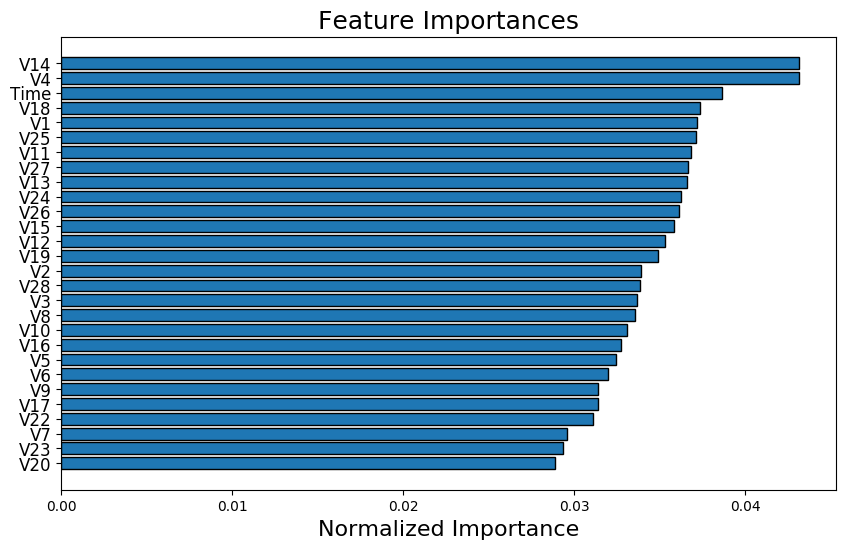

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to DejaVu Sans ('/home/mbenhamd/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


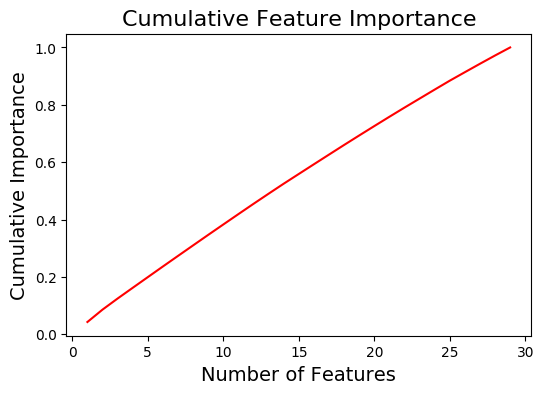

In [30]:
fsDataScale.plot_feature_importances(plot_n=300)

In [31]:
max(fsDataScale.scores)

0.8649819005841665

In [32]:
abc = fsDataScale.feature_importances

In [33]:
# 0.8896923252945911 Normal SMOTE
# 0.5040983606557377 PowerTransformer
# 0.4896864539273603 RobustScaler
# 0.8802501052205369 power_transform

###### Les 5 meilleurs variables dans notre jeu de données par odre décroissant

In [34]:
fsDataScale.feature_importances.sort_values("importance",ascending=F)[:5]

,feature,importance,normalized_importance,cumulative_importance
0,V14,1149.1,0.043155,0.043155
1,V4,1148.7,0.043140,0.086296
2,Time,1029.4,0.038660,0.124955
3,V18,994.5,0.037349,0.162305
4,V1,990.1,0.037184,0.199488


###### Les 10 dernières variables dans notre jeu de données par odre décroissant

In [35]:
fsDataScale.feature_importances.sort_values("importance",ascending=T)[:10]

,feature,importance,normalized_importance,cumulative_importance
28,V21,746.9,0.028050,1.000000
27,V20,768.5,0.028862,0.971950
26,V23,781.7,0.029357,0.943088
25,V7,787.6,0.029579,0.913731
24,V22,827.4,0.031074,0.884152
23,V17,835.4,0.031374,0.853078
22,V9,836.1,0.031400,0.821704
21,V6,851.3,0.031971,0.790304
20,V5,863.7,0.032437,0.758333
19,V16,871.9,0.032745,0.725896


###### GridSearch sur les différents modèles

In [36]:
features_for_model = datascale[abc.sort_values("importance",ascending=F)[:29].feature]

In [37]:
final_scores = []

In [38]:
def runModel(datax,classEs,models,n_splits=5):
    global final_scores
    data=datax
    dataClass=classEs
    skf=StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=T)
    feature_names=list(data.columns)
    scores = np.zeros((n_splits,len(models))).tolist()
    tqdmKFOL=tqdm_notebook(skf.split(data, dataClass),desc="kfold")    
    for i,(train_index, test_index) in enumerate(tqdmKFOL):
        tqdmKFOL.set_description("kfold {}/{} ({:.1f})".format(i,n_splits,i/n_splits*100.))
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = dataClass.iloc[train_index], dataClass.iloc[test_index]
        sm = SMOTE()
        X, y = sm.fit_sample(X_train, y_train)
        tnrangeN=tqdm_notebook(models,desc="model", leave=True)
        for imod,mod in enumerate(tnrangeN):
            model = clone(mod)
            tnrangeN.set_description(str(type(model)).split('.')[-1][:-2])
            model.fit(X,y)
            scores[i][imod]=[model,AUCPRC(y_test,model.predict(X_test.values))[0][1]]  
    return scores

###### On définit les différents modèles et les hyperparamètres

##### LogisticRegression

In [39]:
clfLogisticRegression = make_pipeline( 
                    GridSearchCV(LogisticRegression(solver="liblinear",n_jobs=8,random_state=42),
                    param_grid={"penalty":["l1","l2"],
                                "C": [0.1,0.001,0.001,1,10,20,100],
                                "class_weight": [None, 'balanced'],
                                "max_iter":[100,200]},n_jobs=8,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

##### SVM

In [40]:
clfSVCPolynomial = make_pipeline( 
                    GridSearchCV(SVC(kernel='polynomial',max_iter=10,random_state=42),
                    param_grid={"degree":[2,3,4,5],
                                "C": [20,75,100],"gamma" :["auto",15,25]},n_jobs=1,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

###### KNN

In [41]:
clfKNeighborsClassifier = make_pipeline(GridSearchCV(KNeighborsClassifier(n_jobs=8),
                                param_grid={"n_neighbors":[5],
                                "p": [1,2]},n_jobs=8,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

###### XGBoost

In [42]:
params = {'tree_method':'gpu_hist', 'predictor':'gpu_predictor','random_state':42}
clfXGBClassifier = make_pipeline(GridSearchCV(XGBClassifier(**params),
                    param_grid={"n_estimators":[1000,2000,3000],
                                "learning_rate":[0.1,0.2],
                                "max_depth":[5,10]},n_jobs=1,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

###### RandomForest

In [43]:
clfRandomForestClassifier = make_pipeline(GridSearchCV(RandomForestClassifierSK(random_state=42,n_jobs=8),
                                param_grid={"n_estimators":[10,20,30,100,150]},n_jobs=8,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

###### DecisionTree

In [44]:
params = {'tree_method':'gpu_hist', 'predictor':'gpu_predictor','random_state':42}
clfDecisionTreeClassifier = make_pipeline(GridSearchCV(XGBClassifier(**params),
                                param_grid={"n_estimators":[1]},n_jobs=1,
                                cv=2,scoring=make_scorer(lambda y, y_pred, **kwargs:AUCPRC(y,y_pred)[0][1])))

Fonction calcul de moyenne et d'écart sur les cross-validation

In [144]:
def get_resultat(res,model_name):
    res_arr = []
    for i in range(len(res[0])):
        sum_arr = [res[j][i][1] for j in range(len(res))]    
        res_arr.append(str(round(np.mean(sum_arr)*100,4)) + " , " + str(round(np.std(sum_arr)*100,4)))    
    return list(zip(model_name,res_arr))

In [147]:
model_name=["clfKNeighborsClassifier",
            "clfSVCPolynomial",
            "clfLogisticRegression",  
            "clfRandomForestClassifier",
            "clfXGBClassifier",        
            "clfDecisionTreeClassifier",                
            "LinearDiscriminantAnalysis",
            "QuadraticDiscriminantAnalysis",
            "GaussianNB"
           ]

In [148]:
algo=[ clfKNeighborsClassifier
       clfSVCPolynomial,
       clfLogisticRegression,  
       clfRandomForestClassifier,
       clfXGBClassifier,        
       clfDecisionTreeClassifier,                
       LinearDiscriminantAnalysis(),
       QuadraticDiscriminantAnalysis(),
       GaussianNB()        
        ]

In [150]:
resGSCV=runModel(XTrain.reset_index().dropCol("index"),YTrain.reset_index().dropCol("index"),algo,n_splits=5)

In [ ]:
get_resultat(resGSCV,model_name)

###### On définit les classifieurs optimaux pour chaque modèle  

In [48]:
from mlxtend.classifier import StackingClassifier

###### Voting

In [128]:
clf1 = SVCSK(kernel='poly',max_iter=500,random_state=42,degree=2,C=75,gamma="auto",probability=True)
clf2 = LogisticRegression(n_jobs=8,random_state=42,solver="liblinear",penalty="l2",C=100,class_weight=None,max_iter=100)
clf3 = RandomForestClassifierSK(n_jobs=8,random_state=42,n_estimators=30)
clf4 = XGBClassifier(**params,n_estimators=1000,learning_rate=0.1,max_depth=10)
clf5 = XGBClassifier(**params,n_estimators=1)
clf6 = LinearDiscriminantAnalysis()
clf7 = QuadraticDiscriminantAnalysis()
clf8 = GaussianNB()
clf9 = KNeighborsClassifier(n_jobs=8,n_neighbors=5,p=2)

In [129]:
votSoft =VotingClassifier(estimators=[
                             #('svmPolynomial', clf1),
                             #('clfLogisticRegression', clf2), 
                             ('clfRandomForestClassifier', clf3),
                             ('clfXGBClassifier', clf4),
                             #('clfDecisionTreeClassifier', clf5),
                             #('LinearDiscriminantAnalysis',clf6),
                             #('QuadraticDiscriminantAnalysis',clf7),                             
                             #('GaussianNB', clf8),
                             #('KNeighborsClassifier',clf9)
                             ],voting='soft')

In [130]:
resVoteClassifier=runModel(XTrain.reset_index().dropCol("index"),YTrain.reset_index().dropCol("index"),[votSoft],n_splits=5)

In [131]:
get_resultat(resVoteClassifier,["VoteClassifier"])

[('VoteClassifier', '83.4788 , 1.4408')]

###### Stacking

In [111]:
sclf = StackingClassifier(classifiers=[clf3, clf4],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=XGBClassifier())

In [112]:
resStackingClassifier=runModel(XTrain.reset_index().dropCol("index"),YTrain.reset_index().dropCol("index"),[sclf],n_splits=5)

In [113]:
get_resultat(resStackingClassifier,["StackingClassifier"])

[('StackingClassifier', '84.8637 , 1.7748')]

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


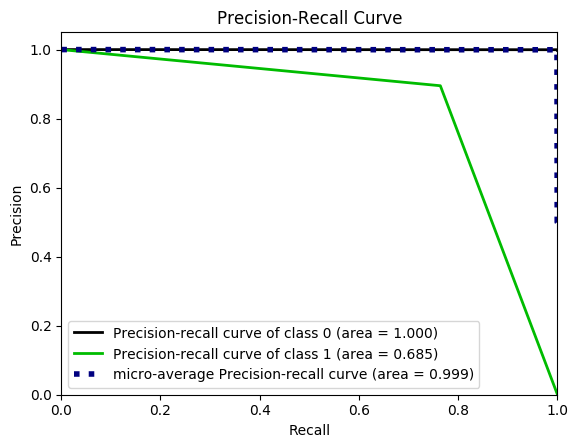

In [140]:
skplt.metrics.plot_precision_recall(YTest,resStackingClassifier[1][0][0].predict_proba(XTest.values))

In [141]:
print("AUCPRC:",AUCPRC(YTest,resStackingClassifier[1][0][0].predict(XTest.values))[0][1])

AUCPRC: 0.8299365147222599


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a363e0390>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a363e0390>
DEBUG:matplotlib.colorbar:Setting pcolormesh


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


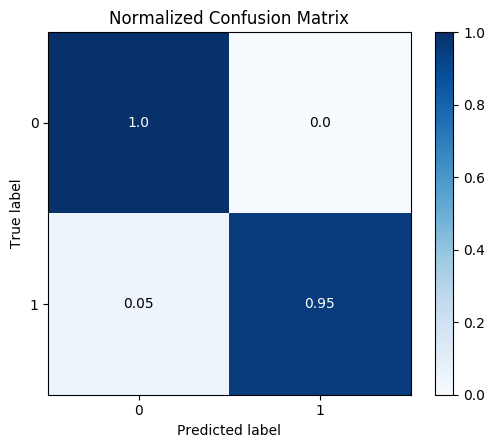

In [142]:
skplt.metrics.plot_confusion_matrix(YTrain,resStackingClassifier[1][0][0].predict(XTrain.values),normalize=True)

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a361622b0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f9a361622b0>
DEBUG:matplotlib.colorbar:Setting pcolormesh


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


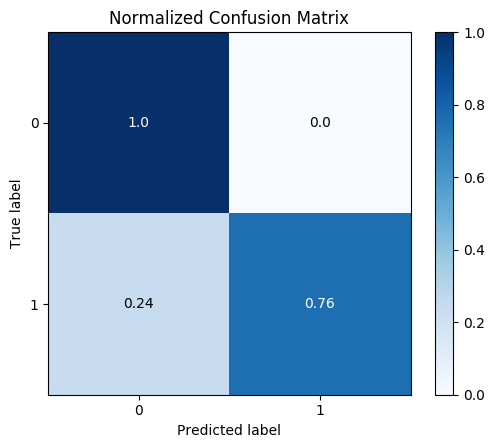

In [143]:
skplt.metrics.plot_confusion_matrix(YTest,resStackingClassifier[1][0][0].predict(XTest.values),normalize=True)